In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

import pandas_ml as pdml
import imblearn

In [6]:
df = pd.read_csv('creditcard.csv', low_memory=False)
X = df.iloc[:,:-1]
y = df['Class']

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "regular data points.")

We have 492 fraud data points and 284315 regular data points.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
print("Size of training set: ", X_train.shape)

Size of training set:  (190820, 30)


# Simplest Neural Network (for testing)

In [11]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(1, activation='sigmoid'))                 # kernel_initializer='normal'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X_train.as_matrix(), y_train, epochs=1)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Epoch 1/1
190820/190820 [==============================] - 17s 90us/step - loss: 0.0291 - acc: 0.9982


In [13]:
print("Loss: ", model.evaluate(X_test.as_matrix(), y_test, verbose=0))

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Loss:  [0.025382173607865408, 0.9984253141391894]


In [14]:
y_predicted = model.predict(X_test.as_matrix()).T[0].astype(int)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [39]:
from pandas_ml import ConfusionMatrix
from sklearn.metrics import  confusion_matrix
y_right = np.array(y_test)
confusion_matrix = confusion_matrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)


Confusion matrix:
[[93839     0]
 [  148     0]]


# Oversampling with gaussian noise (commented out)

In [30]:
# noise = np.random.normal(0,.1,30)

# # 0 is the mean of the normal distribution you are choosing from
# # 1 is the standard deviation of the normal distribution
# # 100 is the number of elements you get in array noise
# noise

In [31]:
# frauds.head()

In [32]:
# for i in range(300):
#     #frauds.iloc[i] += noise[i]
#     frauds.append(frauds.iloc[i % 30] + noise[i % 30])

In [33]:
# NEED TO ADD A (DIFFERENT BUT SIMILAR) RANDOM NOISE ARRAY TO EVERY ROW OF FRAUDS TABLE (WITHOUT CLASS)
# THEN ADD THIS TO ORIGINAL FRAUDS TABLE (MAKING MORE DATA POINTS)
# AND RE SPLIT DATA AND DO NEURAL NET
# ALSO TRY FORCING 50% OF FRAUDS INTO TRAINING SET AND 50% INTO TEST SET

# Neural Network after Oversampling, Scaling, and PCA (10 components)

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

df2 = pdml.ModelFrame(X_train, target=y_train)
sampler = df2.imbalance.over_sampling.SMOTE()
oversampled = df2.fit_sample(sampler)
X2, y2 = oversampled.iloc[:,:-1], oversampled['Class']

data = scale(X2)
pca = PCA(n_components=10)
X2 = pca.fit_transform(data)
X2

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


array([[-2.61690868,  0.03693787,  0.15335265, ...,  0.97305669,
        -0.6109816 ,  2.33557271],
       [-2.70216945, -0.61270978,  0.10789792, ...,  0.28666617,
        -0.1740617 , -1.08629332],
       [-2.72644489, -0.75963119,  0.18737755, ..., -1.29279551,
         0.20842554, -1.32519924],
       ...,
       [ 3.45385237,  0.36544939, -0.4862686 , ...,  2.08373429,
         1.86165474,  0.32210885],
       [ 0.61959177,  0.04929577, -0.01112218, ..., -1.08020178,
         0.08185842,  0.02954122],
       [ 1.75142358,  1.16951516,  3.20811749, ...,  1.22799752,
         1.29906391,  1.40887856]])

In [34]:
model2 = Sequential()
model2.add(Dense(10, input_dim=10, activation='relu')) 
model2.add(Dense(27, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(15, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 27)                297       
_________________________________________________________________
dense_10 (Dense)             (None, 20)                560       
_________________________________________________________________
dense_11 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 16        
Total params: 1,298
Trainable params: 1,298
Non-trainable params: 0
_________________________________________________________________


In [35]:
X2_test = pca.fit_transform(X_test)
h = model2.fit(X2, y2, epochs=5, validation_data=(X2_test, y_test))

Train on 380952 samples, validate on 93987 samples
Epoch 1/5
380952/380952 [==============================] - 22s 57us/step - loss: 0.0205 - acc: 0.9928 - val_loss: 8.4635 - val_acc: 0.4691
Epoch 2/5
380952/380952 [==============================] - 22s 58us/step - loss: 0.0071 - acc: 0.9977 - val_loss: 8.4633 - val_acc: 0.4691
Epoch 3/5
380952/380952 [==============================] - 21s 54us/step - loss: 0.0053 - acc: 0.9985 - val_loss: 8.4631 - val_acc: 0.4691
Epoch 4/5
380952/380952 [==============================] - 20s 54us/step - loss: 0.0045 - acc: 0.9987 - val_loss: 8.4633 - val_acc: 0.4691
Epoch 5/5
380952/380952 [==============================] - 21s 54us/step - loss: 0.0039 - acc: 0.9989 - val_loss: 8.4633 - val_acc: 0.4691


In [36]:
print("Loss: ", model2.evaluate(X2_test, y_test, verbose=2))

Loss:  [8.463291222016695, 0.4691393490595466]


In [37]:
y2_predicted = np.round(model2.predict(X2_test)).T[0]
y2_correct = np.array(y_test)

Confusion matrix:
Predicted  False   True  __all__
Actual                          
False      44002  49837    93839
True          57     91      148
__all__    44059  49928    93987


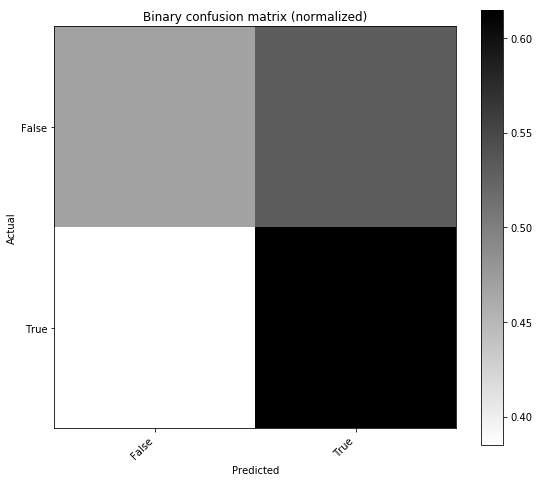

population: 93987
P: 148
N: 93839
PositiveTest: 49928
NegativeTest: 44059
TP: 91
TN: 44002
FP: 49837
FN: 57
TPR: 0.6148648648648649
TNR: 0.4689095152335383
PPV: 0.0018226245793943278
NPV: 0.998706280215166
FPR: 0.5310904847664617
FDR: 0.9981773754206057
FNR: 0.38513513513513514
ACC: 0.4691393490589124
F1_score: 0.0036344755970924196
MCC: 0.006656475891593617
informedness: 0.08377438009840321
markedness: 0.0005289047945604697
prevalence: 0.0015746858608105376
LRP: 1.157740314506372
LRN: 0.821342119584245
DOR: 1.4095713429288255
FOR: 0.0012937197848339726


In [40]:
confusion_matrix2 = ConfusionMatrix(y2_correct, y2_predicted)
print("Confusion matrix:\n%s" % confusion_matrix2)
confusion_matrix2.plot(normalized=True)
plt.show()
confusion_matrix2.print_stats()